In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='whitegrid')
%matplotlib inline

In [2]:
pokemon = pd.read_csv('pokemon.csv')
pokemon = pokemon.rename({'Class 1':'Class1','Class 2':'Class2'}, axis=1)
pokemon

,pid,Name,Class1,Class2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False
...,...,...,...,...,...,...,...,...,...,...,...
795,796,Diancie,Rock,Fairy,50,100,150,100,150,50,True
796,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,True
797,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,True
798,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,True


In [3]:
combats = pd.read_csv('combats.csv')
combats

,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151
...,...,...,...
49995,707,126,707
49996,589,664,589
49997,303,368,368
49998,109,89,109


In [4]:
print('\nNumber of pokemon =',len(pokemon))
print('Some stats about pokemon: \n')
pokemon.drop('pid', axis=1).describe()


Number of pokemon = 800
Some stats about pokemon: 



,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500
std,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474
min,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000
50%,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000
75%,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000
max,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000


In [5]:
types = pokemon['Class1'].append(pokemon['Class2']).dropna().unique()
print('Number of single classes is', types.size,':')
print(list(types))

Number of single classes is 18 :
['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric', 'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice', 'Dragon', 'Dark', 'Steel', 'Flying']


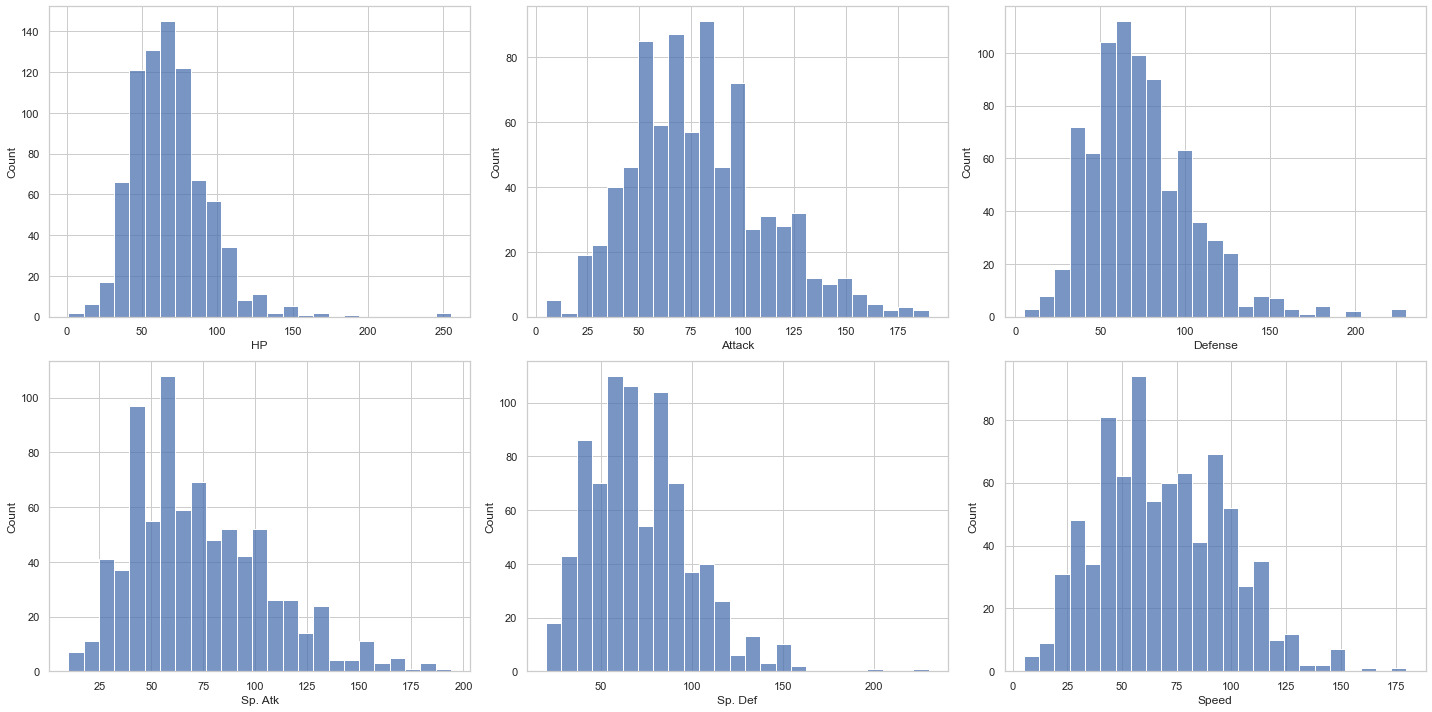

In [6]:
fig, ax = plt.subplots(2,3,figsize=(20,10))
sns.histplot(data=pokemon, x='HP', bins=25, ax=ax[0,0])
sns.histplot(data=pokemon, x='Attack', bins=25, ax=ax[0,1])
sns.histplot(data=pokemon, x='Defense', bins=25, ax=ax[0,2])
sns.histplot(data=pokemon, x='Sp. Atk', bins=25, ax=ax[1,0])
sns.histplot(data=pokemon, x='Sp. Def', bins=25, ax=ax[1,1])
sns.histplot(data=pokemon, x='Speed', bins=25, ax=ax[1,2])
plt.tight_layout()
plt.show()

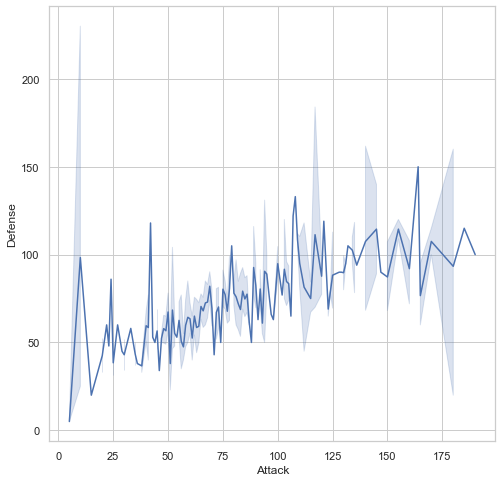

In [7]:
plt.figure(figsize=(8,8))
sns.lineplot(data=pokemon, x='Attack', y='Defense')
plt.show()

In [8]:
# highest Atk/Def
pokemon.loc[(pokemon.Attack/pokemon.Defense).sort_values(ascending=False).head(3).index]

,pid,Name,Class1,Class2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
429,430,DeoxysAttack Forme,Psychic,NaN,50,180,20,180,20,150,True
347,348,Carvanha,Water,Dark,45,90,20,65,20,65,False
19,20,Mega Beedrill,Bug,Poison,65,150,40,15,80,145,False


In [9]:
# lowest Atk/Def
pokemon.loc[(pokemon.Attack/pokemon.Defense).sort_values().head(3).index]

,pid,Name,Class1,Class2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
230,231,Shuckle,Bug,Rock,20,10,230,10,230,5,False
139,140,Magikarp,Water,NaN,20,10,55,15,20,80,False
484,485,Bronzor,Steel,Psychic,57,24,86,24,86,23,False


In [10]:
pokemon_wins = combats.groupby('Winner').agg('count').First_pokemon
top_10 = pokemon_wins.sort_values().tail(10).values

# top 10 in combats
pokemon[pokemon['pid'].isin(top_10)]

,pid,Name,Class1,Class2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
126,127,Seadra,Water,NaN,55,65,95,95,45,85,False
127,128,Goldeen,Water,NaN,45,67,60,35,50,63,False
129,130,Staryu,Water,NaN,30,45,55,70,55,85,False
132,133,Scyther,Bug,Flying,70,110,80,55,80,105,False
133,134,Jynx,Ice,Psychic,65,50,35,115,95,95,False
135,136,Magmar,Fire,NaN,65,95,57,100,85,93,False
151,152,Kabuto,Rock,Water,30,80,90,55,45,55,False


In [11]:
grass_id = np.where(  ((pokemon['Class1']=='Grass') & (pokemon['Class2']!='Rock')) \
                    | ((pokemon['Class2']=='Grass') & (pokemon['Class1']!='Rock')))

rock_id  = np.where(  ((pokemon['Class1']=='Rock') & (pokemon['Class2']!='Grass')) \
                    | ((pokemon['Class2']=='Rock') & (pokemon['Class1']!='Grass')))

In [12]:
pokemon.loc[grass_id].Attack.describe()

count     93.000000
mean      73.731183
std       24.179645
min       27.000000
25%       59.000000
50%       70.000000
75%       95.000000
max      132.000000
Name: Attack, dtype: float64

In [13]:
pokemon.loc[rock_id].Attack.describe()

count     56.000000
mean      91.785714
std       34.805284
min       10.000000
25%       63.000000
50%       92.500000
75%      116.250000
max      165.000000
Name: Attack, dtype: float64

In [14]:
import math
from scipy import stats

# comparing mean
print(stats.ttest_ind(pokemon.loc[grass_id].Attack, pokemon.loc[rock_id].Attack, equal_var=False))
print('\np<0.05 => Not the same mean => rock type have higher attack => oak is wrong')

Ttest_indResult(statistic=-3.4169379582521513, pvalue=0.0009640546913545304)

p<0.05 => Not the same mean => rock type have higher attack => oak is wrong


In [15]:
# SPARK


In [16]:
import warnings
warnings.simplefilter(action='ignore')

features = ['Class1', 'Class2', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Legendary']

for feature in features:
    combats['1_'+feature] = combats.First_pokemon.apply(lambda x: pokemon.loc[x-1][feature])
    combats['2_'+feature] = combats.Second_pokemon.apply(lambda x: pokemon.loc[x-1][feature])
    
# 1 = first wins / 0 = second wins
combats['Winner'] = combats['Winner']==combats['First_pokemon']
combats['Winner'] = combats['Winner'].astype(int)

# dummies for classes
combats = pd.get_dummies(combats, columns=['1_Class1','1_Class2'], prefix=['1_Class_1','1_Class_2'])
combats = pd.get_dummies(combats, columns=['2_Class1','2_Class2'], prefix=['2_Class_1','2_Class_2'])

In [17]:
combats

,First_pokemon,Second_pokemon,Winner,1_HP,2_HP,1_Attack,2_Attack,1_Defense,2_Defense,1_Sp. Atk,...,2_Class_2_Ghost,2_Class_2_Grass,2_Class_2_Ground,2_Class_2_Ice,2_Class_2_Normal,2_Class_2_Poison,2_Class_2_Psychic,2_Class_2_Rock,2_Class_2_Steel,2_Class_2_Water
0,266,298,0,50,70,64,70,50,40,45,...,0,0,0,0,0,0,0,0,0,0
1,702,701,0,91,91,90,129,72,90,90,...,0,0,0,0,0,0,0,0,0,0
2,191,668,0,55,75,40,75,85,75,80,...,0,0,0,0,0,0,0,0,0,0
3,237,683,0,40,77,40,120,40,90,70,...,0,0,0,0,0,0,0,0,0,0
4,151,231,1,70,20,60,10,125,230,115,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,707,126,1,100,30,120,40,100,70,150,...,0,0,0,0,0,0,0,0,0,0
49996,589,664,1,60,35,85,55,40,40,30,...,0,0,0,0,0,0,0,0,0,0
49997,303,368,0,60,73,50,115,100,60,85,...,0,0,0,0,0,0,0,0,0,0
49998,109,89,1,40,25,30,35,50,70,55,...,0,0,0,0,0,0,0,0,1,0


In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

train, test = train_test_split(combats, test_size=0.1, random_state=42)

X_train = train.drop(columns=['First_pokemon','Second_pokemon','Winner'])
y_train = train['Winner']
X_test = test.drop(columns=['First_pokemon','Second_pokemon','Winner'])
y_test = test['Winner']

In [19]:
import itertools
from joblib import Parallel, delayed
import multiprocessing

n_estimators = [10,25,50,100]
max_depth = [2,4,10]

inputs = list(itertools.product(n_estimators,max_depth))

def processInput(n_estimators,max_depth):
    clf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
    clf.fit(X_train, y_train)
    return clf.score(X_train, y_train)
 
num_cores = multiprocessing.cpu_count()-2
     
results = Parallel(n_jobs=num_cores)(delayed(processInput)(n_estimators,max_depth) for n_estimators,max_depth in inputs)

In [20]:
p_tab = pd.DataFrame(columns=['n_estimators', 'max_depth', 'score'])

for i in range(0,len(results)):
    p_tab.loc[len(p_tab)] = [inputs[i][0], inputs[i][1], results[i]]
    
best = p_tab.loc[p_tab['score'].idxmax()]
    
p_tab.sort_values(by='score', ascending=False)

,n_estimators,max_depth,score
11,100.0,10.0,0.914089
8,50.0,10.0,0.910756
5,25.0,10.0,0.901111
2,10.0,10.0,0.887444
7,50.0,4.0,0.815978
10,100.0,4.0,0.813644
4,25.0,4.0,0.808511
1,10.0,4.0,0.786267
6,50.0,2.0,0.778489
3,25.0,2.0,0.776933


In [21]:
clf = RandomForestClassifier(n_estimators=int(best[0]), max_depth=best[1], random_state=42)
clf.fit(X_train, y_train)
clf.score(X_test,y_test)

0.9036

In [22]:
features_importance = pd.DataFrame(index=X_train.columns, data=clf.feature_importances_).sort_values(by=0, ascending=False).head(10).reset_index()
features_importance

,index,0
0,1_Speed,0.298400
1,2_Speed,0.263242
2,2_Attack,0.053487
3,1_Attack,0.048001
4,1_Sp. Atk,0.046454
5,2_Sp. Atk,0.043958
6,1_HP,0.029687
7,2_Sp. Def,0.025950
8,2_HP,0.025678
9,1_Sp. Def,0.023881


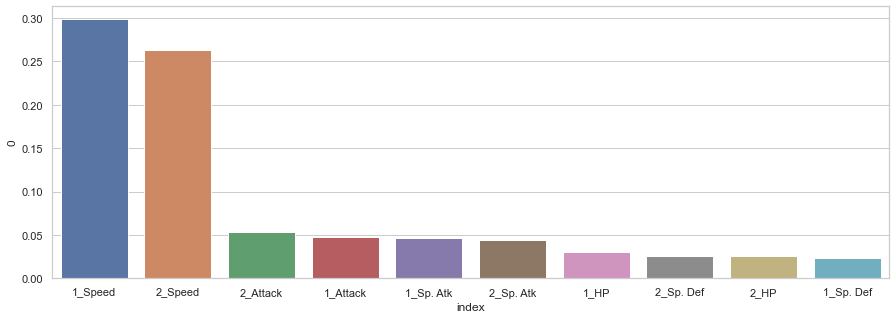

In [23]:
plt.figure(figsize=(15,5))
sns.barplot(x='index', y=0, data=features_importance)
plt.show()

In [24]:
combats = combats[['First_pokemon','Second_pokemon','Winner']]
combats

,First_pokemon,Second_pokemon,Winner
0,266,298,0
1,702,701,0
2,191,668,0
3,237,683,0
4,151,231,1
...,...,...,...
49995,707,126,1
49996,589,664,1
49997,303,368,0
49998,109,89,1


In [25]:
pokemon_wins_ratio = combats.groupby('First_pokemon')[['Winner']].sum()/combats.groupby('First_pokemon')[['Winner']].agg('count')
pokemon_wins_ratio = pokemon_wins_ratio.rename({'Winner':'ratio'}, axis=1)
pokemon_wins_ratio

,ratio
First_pokemon,
1,0.171429
2,0.363636
3,0.632353
4,0.580645
5,0.480000
...,...
796,0.346939
797,0.890625
798,0.283333


In [26]:
pokemon[pokemon['pid'].isin(pokemon_wins_ratio.sort_values(by='ratio', ascending=False).head(10).index)]

,pid,Name,Class1,Class2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
19,20,Mega Beedrill,Bug,Poison,65,150,40,15,80,145,False
146,147,Jolteon,Electric,NaN,65,65,60,110,95,130,False
153,154,Aerodactyl,Rock,Flying,80,105,65,60,75,130,False
154,155,Mega Aerodactyl,Rock,Flying,80,135,85,70,95,150,False
275,276,Mega Sceptile,Grass,Dragon,70,110,75,145,85,145,False
426,427,Mega Rayquaza,Dragon,Flying,105,180,100,180,100,115,True
428,429,Deoxys Normal Forme,Psychic,NaN,50,150,50,150,50,150,True
512,513,Weavile,Dark,Ice,70,120,65,45,85,125,False
726,727,Greninja,Water,Dark,72,95,67,103,71,122,False
791,792,Noivern,Flying,Dragon,85,70,80,97,80,123,False


In [27]:
duels = pd.DataFrame(columns=['pokemon_1','pokemon_2'], data=itertools.combinations(pokemon.pid,r=2))
duels['score'] = 0

for idx, row in combats.iterrows():
    if (row.Winner==1):
        duels.loc[idx,'score'] = duels.loc[idx]['score'] + 1
    else:
        duels.loc[idx,'score'] = duels.loc[idx]['score'] - 1 

duels

,pokemon_1,pokemon_2,score
0,1,2,-1
1,1,3,-1
2,1,4,-1
3,1,5,-1
4,1,6,1
...,...,...,...
319595,797,799,0
319596,797,800,0
319597,798,799,0
319598,798,800,0


In [28]:
import networkx as nx

G = nx.DiGraph()

G.add_nodes_from(pokemon.pid)

for _, row in duels.iterrows():
    if (row.score>0):
        G.add_edge(row['pokemon_1'], row['pokemon_2'])
    if (row.score<0):
        G.add_edge(row['pokemon_2'], row['pokemon_1'])

In [29]:
A = nx.adjacency_matrix(G) + np.square(nx.adjacency_matrix(G))

In [30]:
top_10_dominance = pd.DataFrame(A.sum(axis=1)).sort_values(by=0, ascending=False).head(10).index
pokemon.loc[top_10_dominance]

,pid,Name,Class1,Class2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
57,58,Meowth,Normal,NaN,40,45,35,40,40,90,False
31,32,Raichu,Electric,NaN,60,90,55,90,80,110,False
18,19,Beedrill,Bug,Poison,65,90,40,45,80,75,False
56,57,Dugtrio,Ground,NaN,35,80,50,50,70,120,False
22,23,Pidgeot,Normal,Flying,83,80,75,70,70,101,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
43,44,Ninetales,Fire,NaN,73,76,75,81,100,100,False
46,47,Zubat,Poison,Flying,40,45,35,30,40,55,False
38,39,Nidorino,Poison,NaN,61,72,57,55,55,65,False
33,34,Sandslash,Ground,NaN,75,100,110,45,55,65,False
